# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = ""
weather_data = []

for city in cities:
    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        if (weather_json["cod"] == 429):
            print("waiting ....")
            time.sleep(60)  
            print(".... finished")
        else:
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]
            temperature = weather_json["main"]["temp"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["weather"][0]["description"]
            wind_speed = weather_json["wind"]["speed"]

            weather_data.append({"city": city,
                        "latitude": latitude,
                        "longitude": longitude,
                        "temperature": temperature,
                        "humidity": humidity,
                        "cloudiness": cloudiness,
                        "wind speed": wind_speed})
        
    except:
        print(f"no weather data for {city}")
        
    

print(weather_data)

no weather data for attawapiskat
no weather data for barentsburg
no weather data for nizhneyansk
no weather data for rungata
no weather data for illoqqortoormiut
no weather data for taolanaro
no weather data for verdalsora
no weather data for tsihombe
no weather data for mys shmidta
no weather data for tiruvottiyur
no weather data for fort saint john
no weather data for toliary
no weather data for grand river south east
no weather data for sentyabrskiy
no weather data for ust-kamchatsk
no weather data for bolungarvik
no weather data for kadykchan
no weather data for jahrom
no weather data for haibowan
no weather data for vaitupu
no weather data for umzimvubu
no weather data for belushya guba
no weather data for labutta
no weather data for karamay
no weather data for karamea
no weather data for opobo
no weather data for saleaula
no weather data for kavant
no weather data for tumannyy
no weather data for asayita
no weather data for lolua
no weather data for saundatti yellamma
no weather 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df = pd.DataFrame(weather_data)
print(weather_data_df.head())


                city  latitude  longitude  temperature  humidity  \
0            mataura    -46.19     168.86        46.00        78   
1            ballina    -28.87     153.57        65.97        68   
2         butaritari      3.07     172.79        84.07        76   
3    bambous virieux    -20.34      57.76        81.21        78   
4  nizhniy tsasuchey     50.52     115.13        32.43        53   

         cloudiness  wind speed  
0     broken clouds        3.60  
1     broken clouds       14.99  
2        light rain       15.10  
3     broken clouds        3.36  
4  scattered clouds       16.02  


In [ ]:
weather_data_df.to_csv("weather_data_results.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

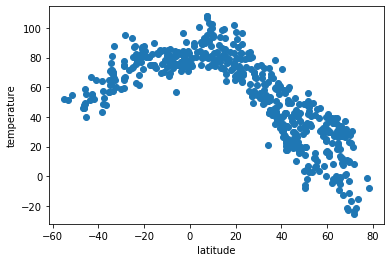

In [7]:
plt.scatter("latitude", "temperature", data=weather_data_df)
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.show()

#### Latitude vs. Humidity Plot

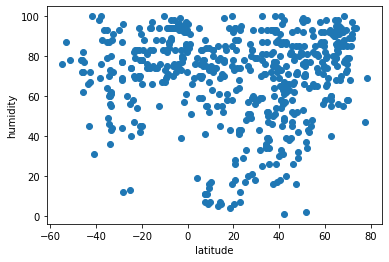

In [8]:
plt.scatter("latitude", "humidity", data=weather_data_df)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

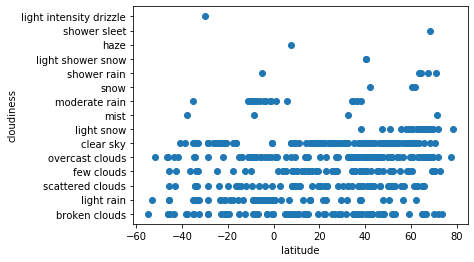

In [9]:
plt.scatter("latitude", "cloudiness", data=weather_data_df)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

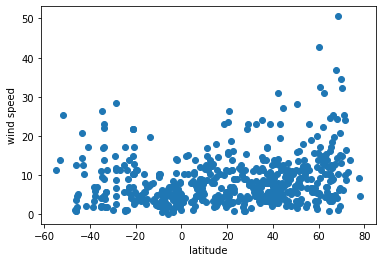

In [10]:
plt.scatter("latitude", "wind speed", data=weather_data_df)
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y, x_label, y_label):
    m,b = np.polyfit(x, y, 1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, 'yo', x, m*x+b, '--k')
    

In [12]:
# Create Northern and Southern Hemisphere DataFrames

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = ""
weather_data_s = []
weather_data_n = []

for city in cities:
    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        if (weather_json["cod"] == "429"):
            time.sleep(60000)           
        else:
            latitude = weather_json["coord"]["lat"]
            longitude = weather_json["coord"]["lon"]
            temperature = weather_json["main"]["temp_max"]
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["weather"][0]["description"]
            wind_speed = weather_json["wind"]["speed"]

            if (latitude < 0):
                weather_data_n.append({"city": city,
                        "latitude": latitude,"longitude": longitude,
                        "longitude": longitude,
                        "temperature": temperature,
                        "humidity": humidity,
                        "cloudiness": cloudiness,
                        "wind speed": wind_speed})
            else:
                weather_data_s.append({"city": city,
                        "latitude": latitude,
                        "longitude": longitude,
                        "temperature": temperature,
                        "humidity": humidity,
                        "cloudiness": cloudiness,
                        "wind speed": wind_speed})
        
    except:
        print(f"no weather data for {city}")
        
    
weather_data_n_df = pd.DataFrame(weather_data_n)
weather_data_s_df = pd.DataFrame(weather_data_s)
print(weather_data_n_df.head())
print(weather_data_s_df.head())

no weather data for attawapiskat
no weather data for barentsburg
no weather data for nizhneyansk
no weather data for rungata
no weather data for illoqqortoormiut
no weather data for taolanaro
no weather data for verdalsora
no weather data for tsihombe
no weather data for mys shmidta
no weather data for tiruvottiyur
no weather data for fort saint john
no weather data for toliary
no weather data for grand river south east
no weather data for sentyabrskiy
no weather data for ust-kamchatsk
no weather data for bolungarvik
no weather data for kadykchan
no weather data for jahrom
no weather data for haibowan
no weather data for vaitupu
no weather data for umzimvubu
no weather data for belushya guba
no weather data for labutta
no weather data for karamay
no weather data for karamea
no weather data for opobo
no weather data for saleaula
no weather data for kavant
no weather data for tumannyy
no weather data for asayita
no weather data for lolua
no weather data for saundatti yellamma
no weather 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

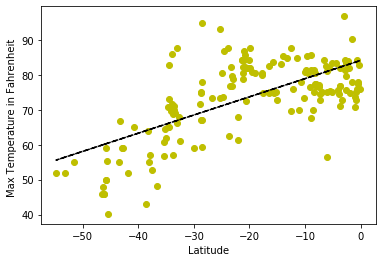

In [13]:
linear_regression(weather_data_n_df["latitude"], weather_data_n_df["temperature"], 
                  "Latitude", "Max Temperature in Fahrenheit ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

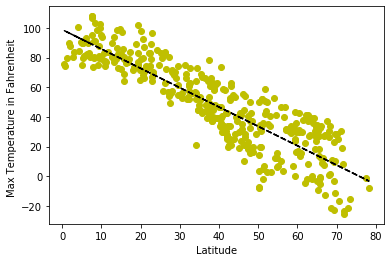

In [14]:
linear_regression(weather_data_s_df["latitude"], weather_data_s_df["temperature"], 
                  "Latitude", "Max Temperature in Fahrenheit ")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

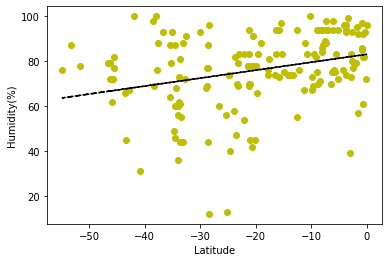

In [15]:
linear_regression(weather_data_n_df["latitude"], weather_data_n_df["humidity"], 
                  "Latitude", "Humidity(%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

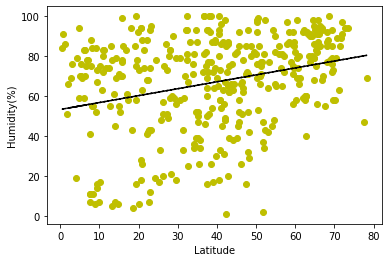

In [16]:
linear_regression(weather_data_s_df["latitude"], weather_data_s_df["humidity"], 
                  "Latitude", "Humidity(%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [17]:
cloudiness_values = weather_data_n_df["cloudiness"].sort_values().unique()
cloudiness_to_numerical_values = []
for x in cloudiness_values:
    cloudiness_to_numerical_values

# cloudiness_group = weather_data_n_df.groupby("cloudiness")
# count_cloudiness_df = pd.DataFrame( cloudiness_group["cloudiness"].count())

linear_regression(weather_data_s_df["latitude"], weather_data_s_df["cloudiness"], 
                  "Latitude", "Cloudiness(%)")

TypeError: can only concatenate str (not "float") to str

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#linear_regression(weather_data_s_df["latitude"], weather_data_s_df["cloudiness"], 
#                  "Latitude", "Cloudiness(%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

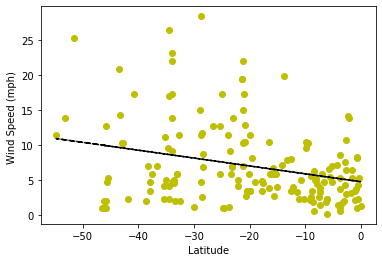

In [18]:
linear_regression(weather_data_n_df["latitude"], weather_data_n_df["wind speed"], 
                  "Latitude", "Wind Speed (mph) ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

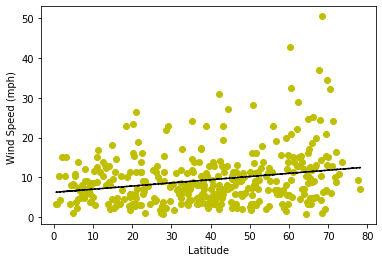

In [19]:
linear_regression(weather_data_s_df["latitude"], weather_data_s_df["wind speed"], 
                  "Latitude", "Wind Speed (mph) ")